In [1]:
#============== NUMBA AND NUMPY ==============
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec

import SolverCQWs as solver
from IPython.display import display, Math
from tabulate import tabulate

q = 1.602176e-19 #C
kb = 1.3806504e-23 #J/K
nii = 0.0
hbar = 1.054588757e-34
m_e= 9.1093826E-31 #kg
pi=np.pi
eps0= 8.8541878176e-12 #F/m
J2meV=1e3/q
from thomas_solve  import TDMA
#matplotlib options
#plt.rcParams['font.family']         = 'Times New Roman'
#plt.rcParams['font.serif']          = 'Times'
plt.rcParams['xtick.labelsize']     = 20
plt.rcParams['ytick.labelsize']     = 20
plt.rcParams['axes.linewidth']      = 2
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  2
plt.rcParams["xtick.minor.width"]   =  2
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  2

plt.rcParams["ytick.minor.width"]   =  2
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False

import platform
if platform.system() == 'Linux':
    newpath = os.getcwd() + '/EFILED-M4_3523'
    
elif  platform.system() == 'Windows':
    newpath = os.getcwd() + '\\EFILED-M4_3523'
    
if not os.path.exists(newpath):
    os.makedirs(newpath)





mpl.rcParams['font.size'] = 13


In [2]:
EgAlGaAs = lambda x,T: 1.155*x + 0.37*x**2 - 5.405E-4*T**2/(T+204)
EgAlGaAs(0.15,30)*1000

179.49615384615385

# Correct Biniding Energy

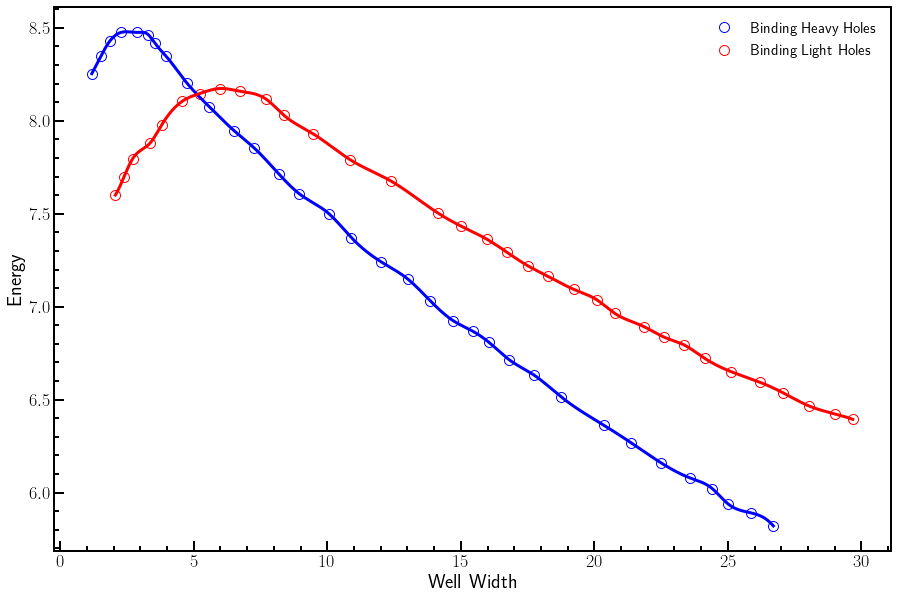

In [2]:
from scipy.interpolate import interp1d
import glob as gb
files = gb.glob('BINDING/*')
files

bhh = np.genfromtxt(files[0],delimiter=',')
blh = np.genfromtxt(files[-2],delimiter=',')


fhh= interp1d(bhh[:,0]/10, bhh[:,1],kind='cubic')
flh= interp1d(blh[:,0]/10, blh[:,1],kind='cubic')
ndat = round(((bhh[-1,0]/10)-(bhh[0,0]/10))/0.002) 
ndatlh = round(((blh[-1,0]/10)-(blh[0,0]/10))/0.002) 

xnew = np.linspace(bhh[0,0]/10,bhh[-1,0]/10,int(ndat))
xnewlh = np.linspace(blh[0,0]/10,blh[-1,0]/10,int(ndatlh))


fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(bhh[:,0]/10,bhh[:,1],'o',mfc='w',ms=10,lw=3,c='b',label='Binding Heavy Holes')
ax.plot(blh[:,0]/10,blh[:,1],'o',mfc='w',ms=10,lw=3,c='r',label='Binding Light Holes')
ax.plot(xnew,fhh(xnew),'-b',lw=3)
ax.plot(xnewlh,flh(xnewlh),'-r',lw=3)
ax.legend(fontsize=15)
ax.set_ylabel('Energy',fontsize=20)
ax.set_xlabel('Well Width',fontsize=20)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

In [4]:
print('Energy binding hh to well widht 23.74nm : %.1f'%fhh(23.74))
print('Energy binding lh to well widht 23.74nm : %.1f'%flh(23.74))
print('Energy binding hh to well widht 11.87nm : %.1f'%fhh(11.87))
print('Energy binding lh to well widht 11.87nm : %.1f'%flh(11.87))
print('Energy binding hh to well widht 13.85nm : %.1f'%fhh(13.85))
print('Energy binding lh to well widht 13.85nm : %.1f'%flh(13.85))
print('Energy binding hh to well widht 10.0nm : %.1f'%fhh(10.0))
print('Energy binding lh to well widht 10.0nm : %.1f'%flh(10.0))

Energy binding hh to well widht 23.74nm : 6.1
Energy binding lh to well widht 23.74nm : 6.8
Energy binding hh to well widht 11.87nm : 7.3
Energy binding lh to well widht 11.87nm : 7.7
Energy binding hh to well widht 13.85nm : 7.0
Energy binding lh to well widht 13.85nm : 7.5
Energy binding hh to well widht 10.0nm : 7.5
Energy binding lh to well widht 10.0nm : 7.9


# M4_3523

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.4696   |   HH1->-0.0661    |   LH1->-0.0686    |
|   E2-> 1.4788   |   HH2->-0.0665    |   LH2->-0.0718    |
|   E3-> 1.5149   |   HH3->-0.0690    |   LH3->-0.0729    |
|   E4-> 1.5197   |   HH4->-0.0693    |   LH4->-0.0765    |
|   E5-> 1.5211   |   HH5->-0.0716    |   LH5->-0.0792    |


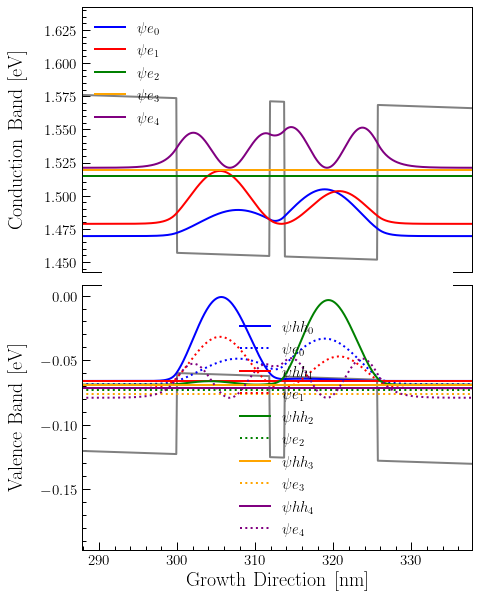

CPU times: user 3.42 s, sys: 344 ms, total: 3.77 s
Wall time: 1.66 s


In [6]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastructure
mev=3e-3
# TEMPERATURE
s4.T = 30#Kelvin
# Binding Energy
s4.HHBinding =fhh(11.87)*mev #meV
s4.LHBinding =flh(11.87)*mev#meV

# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 5
# APPLIED ELECTRIC FIELD
s4.Fapp = 2e5 # (V/m)

# For 1D, z-axis is choosen
s4.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]




structure4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(structure4) #
#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = True,Print=True)
#TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
#np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')
solver.Solver(model4).plotting(sol4,amp=5,axmin=25,axmax=25,eymin =-0.085,eymax=0.03,hymin=-0.02,hymax=0.15)
solver.Solver(model4).print_result("M4_3523",sol4)

In [25]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(11.87)*mev
bindingTQWlh = flh(11.87)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol4.Ee[0]+sol4.Ehh[0] - bindingTQWhh
lh1 = sol4.Ee[0]+sol4.Elh[0] - bindingTQWlh
hh2 = sol4.Ee[1]+sol4.Ehh[1] - bindingnQWhh
lh2 = sol4.Ee[1]+sol4.Elh[1] - bindingnQWlh
hh3 = sol4.Ee[2]+sol4.Ehh[2] - bindingTQWhh
lh3 = sol4.Ee[2]+sol4.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))



 hh1 : 1.5287 
 lh1 : 1.5341 
 hh2 : 1.5406 
 lh2 : 1.5503 
 hh3 : 1.5949 
 lh3 : 1.6195 



In [75]:
 # Wave Function electron
#arrays to export

fxmin = -750
fxmax = +750
xmin = int(model4.n_max/2+fxmin)
xmax = int(model4.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol4.xaxis[xmin]/nm,sol4.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol4.xaxis[xmin:xmax].shape)
Exp_Bands4 = np.zeros((sol4.xaxis[xmin:xmax].shape[0],3))
Exp_Psie4  = np.zeros((sol4.Psie[xmin:xmax,0].shape[0],sol4.Psie.shape[1]+1))
Exp_Psihh4 = np.zeros((sol4.Psihh[xmin:xmax,0].shape[0],sol4.Psihh.shape[1]+1))
Exp_Psilh4 = np.zeros((sol4.Psilh[xmin:xmax,0].shape[0],sol4.Psilh.shape[1]+1))

Exp_Bands4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psie4[:,0]  = sol4.xaxis[xmin:xmax]/nm
Exp_Psihh4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psilh4[:,0] = sol4.xaxis[xmin:xmax]/nm

Exp_Bands4[:,1] = sol4.CB[xmin:xmax]
Exp_Bands4[:,2] = sol4.VB[xmin:xmax]

for i in range(1,model4.subbands+1):
    Exp_Psie4[:,i]  = amp*sol4.Psie[xmin:xmax,i-1]+sol4.Ee[i-1]
    Exp_Psihh4[:,i] = amp*sol4.Psihh[xmin:xmax,i-1]-sol4.Ehh[i-1]
    Exp_Psilh4[:,i] = amp*sol4.Psilh[xmin:xmax,i-1]-sol4.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3523.txt',Exp_Bands4,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3523.txt',Exp_Psie4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3523.txt',Exp_Psihh4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3523.txt',Exp_Psilh4,delimiter=',',fmt="%s")



To export data, xmin: 237, xmax:387
Data dimensions to export 1500


In [26]:
print('Ecperimental H1: %.4f'%1.532778)
print('Ecperimental L1: %.4f'%1.53798)

Ecperimental H1: 1.5328
Ecperimental L1: 1.5380


# Calculate $\Delta E $ 

In [102]:
print("Delta Ee: %.1f"%((sol4.Ee[1]-sol4.Ee[0])*1e3))
print("Delta EH: %.1f"%((sol4.Ehh[0]-sol4.Elh[0])*1e3))
print("Delta EH: %.1f"%((sol4.Ehh[1]-sol4.Elh[1])*1e3))



Delta Ee: 8.9
Delta EH: -4.9
Delta EH: -11.0


# CQWS with different E

In [192]:
datae1 = np.zeros((model4.xaxis.shape[0],8))
datae2 = np.zeros((model4.xaxis.shape[0],8))
datahh1 = np.zeros((model4.xaxis.shape[0],8))
datahh2 = np.zeros((model4.xaxis.shape[0],8))
datalh1 = np.zeros((model4.xaxis.shape[0],8))
datalh2 = np.zeros((model4.xaxis.shape[0],8))
cbs   = np.zeros((model4.xaxis.shape[0],8))
vbs   = np.zeros((model4.xaxis.shape[0],8))
datae = []
datahh = []
datalh = []
Delta   =  []
Deltae   =  []
Deltah   =  []
Deltal  =  []
Fapplied = []
ehh   = []
elh   = []
nm = 1e-9
for i in range(0,7):
    class Structure(object): pass
    s = Structure() # this will be our datastructure
    # TEMPERATURE
    s.T = 30 #Kelvin

    # Binding Energy
    s.HHBinding =9e-3 #meV
    s.LHBinding =9e-3 #meV

    # Band Offset ratios
    s.Qc = 0.65
    s.Qv = 0.35

#s0.scheme = 0

    # Total subband number to be calculated for electrons
    s.subbands = 2
    # APPLIED ELECTRIC FIELD
    s.Fapp = i*1e5 # (V/m)
    print(i*1e5 )

    # For 1D, z-axis is choosen
    s.gridfactor = 0.1#nm

    s.material =[
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]

    structure = s
    model = solver.StructureFrom(structure) #
    sol   = solver.Solver(model).QuantumSolutions(absolute =True,Print=False)
   
    datae1 [:,i+1] =10*sol.Psie[:,0]+sol.Ee[0]
    datae2 [:,i+1] =10*sol.Psie[:,1]+sol.Ee[1]
    datahh1 [:,i+1]= 5*sol.Psihh[:,0]-sol.Ehh[0]
    datahh2 [:,i+1] =5*sol.Psihh[:,1]-sol.Ehh[1]
    datalh1 [:,i+1] =5*sol.Psilh[:,0]-sol.Elh[0]
    datalh2 [:,i+1] =5*sol.Psilh[:,1]-sol.Elh[1]
    cbs     [:,i+1] =sol.CB  
    vbs     [:,i+1] =sol.VB                           
    datae.append((sol.Ee))
    Delta.append((sol.Ehh[0]-sol.Elh[0]))
    Deltae.append((sol.Ee[1]-sol.Ee[0]))
    Deltah.append((sol.Ehh[1]-sol.Ehh[0]))
    Deltal.append((sol.Elh[1]-sol.Elh[0]))
    ehh.append((-sol.Ehh))
    elh.append((-sol.Elh))




datae1[:,0]  = sol.xaxis/nm
datae2[:,0]  = sol.xaxis/nm
datahh1 [:,0]= sol.xaxis/nm
datahh2 [:,0] = sol.xaxis/nm
datalh1 [:,0] = sol.xaxis/nm
datalh2 [:,0] = sol.xaxis/nm
cbs     [:,0] = sol.xaxis/nm
vbs     [:,0] = sol.xaxis/nm      
datae = np.asarray(datae)
datahh = np.asarray(datahh)
datlh = np.asarray(datalh)
Delta = np.asarray(Delta)
ehh=np.asarray(ehh)
elh=np.asarray(elh)



0.0
Total layer number: 5
100000.0
Total layer number: 5
200000.0
Total layer number: 5
300000.0
Total layer number: 5
400000.0
Total layer number: 5
500000.0
Total layer number: 5
600000.0
Total layer number: 5


In [193]:
elh

array([[-0.00951853, -0.01644224],
       [-0.00717419, -0.01421616],
       [-0.00470696, -0.01209209],
       [-0.00213173, -0.01005498],
       [ 0.00053277, -0.00808587],
       [ 0.00326856, -0.00616645],
       [ 0.00606061, -0.00428119]])

In [194]:
ehh

array([[-0.00459597, -0.00549086],
       [-0.00194378, -0.0035716 ],
       [ 0.00097066, -0.00189158],
       [ 0.00393499, -0.00023806],
       [ 0.00692117,  0.00141768],
       [ 0.00308374, -0.00494218],
       [ 0.00476494, -0.00208437]])

In [195]:
np.savetxt(newpath+'/AEF-CB.dat',cbs,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-VB.dat',vbs,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Psie-1.dat',datae1,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Psie-2.dat',datae2,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Pshh-1.dat',datahh1,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Pshh-2.dat',datahh2,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Pslh-1.dat',datalh1,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Pslh-2.dat',datalh2,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Ee.dat',datae,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Ehh.dat',ehh,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/AEF-Elh.dat',elh,delimiter=',',fmt="%s")   


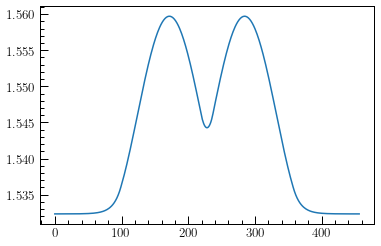

In [113]:
plt.plot(datae1[:,1])

In [15]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(13.85)*mev
bindingTQWlh = flh(13.85)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol5.Ee[0]+sol5.Ehh[0] - bindingTQWhh
lh1 = sol5.Ee[0]+sol5.Elh[0] - bindingTQWlh
hh2 = sol5.Ee[1]+sol5.Ehh[1] - bindingnQWhh
lh2 = sol5.Ee[1]+sol5.Elh[1] - bindingnQWlh
hh3 = sol5.Ee[2]+sol5.Ehh[2] - bindingTQWhh
lh3 = sol5.Ee[2]+sol5.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))



 hh1 : 1.5273 
 lh1 : 1.5314 
 hh2 : 1.5368 
 lh2 : 1.5460 
 hh3 : 1.5837 
 lh3 : 1.6058 



In [38]:
print("Delta E: %.1f"%((sol5.Ee[1]-sol5.Ee[0])*1e3))
print("Delta E: %.1f"%((sol5.Ehh[1]-sol5.Ehh[0])*1e3))
print("Delta E: %.1f"%((sol5.Elh[0]-sol5.Ehh[1])*1e3))

Delta E: 8.4
Delta E: 1.3
Delta E: 3.3


In [73]:
 # Wave Function electron
#arrays to export

# fxmin = -430
# fxmax = +470
# xmin = int(model5.n_max/2+fxmin)
# xmax = int(model5.n_max/2 + fxmax)
# amp  = 7
# print ('To export data, xmin: %d, xmax:%d'%(sol5.xaxis[xmin]/nm,sol5.xaxis[xmax]/nm))
# print('Data dimensions to export %d'%sol5.xaxis[xmin:xmax].shape)
# Exp_Bands = np.zeros((sol5.xaxis[xmin:xmax].shape[0],3))
# Exp_Psie  = np.zeros((sol5.Psie[xmin:xmax,0].shape[0],sol5.Psie.shape[1]+1))
# Exp_Psihh = np.zeros((sol5.Psihh[xmin:xmax,0].shape[0],sol5.Psihh.shape[1]+1))
# Exp_Psilh = np.zeros((sol5.Psilh[xmin:xmax,0].shape[0],sol5.Psilh.shape[1]+1))

# Exp_Bands[:,0] = sol5.xaxis[xmin:xmax]/nm
# Exp_Psie[:,0]  = sol5.xaxis[xmin:xmax]/nm
# Exp_Psihh[:,0] = sol5.xaxis[xmin:xmax]/nm
# Exp_Psilh[:,0] = sol5.xaxis[xmin:xmax]/nm

# Exp_Bands[:,1] = sol5.CB[xmin:xmax]
# Exp_Bands[:,2] = sol5.VB[xmin:xmax]

# for i in range(1,model5.subbands+1):
#     Exp_Psie[:,i]  = amp*sol5.Psie[xmin:xmax,i-1]+sol5.Ee[i-1]
#     Exp_Psihh[:,i] = amp*sol5.Psihh[xmin:xmax,i-1]-sol5.Ehh[i-1]
#     Exp_Psilh[:,i] = amp*sol5.Psilh[xmin:xmax,i-1]-sol5.Elh[i-1]
    
# np.savetxt(newpath+'/Bands-M4_3140.txt',Exp_Bands,delimiter=',',fmt="%s")   
# np.savetxt(newpath+'/Psi-Electrons-M4_3140.txt',Exp_Psie,delimiter=',',fmt="%s")
# np.savetxt(newpath+'/Psi-HeavyHoles-M4_3140.txt',Exp_Psihh,delimiter=',',fmt="%s")
# np.savetxt(newpath+'/Psi-LightHoles-M4_3140.txt',Exp_Psilh,delimiter=',',fmt="%s")


Exp_Psie.shape

To export data, xmin: 270, xmax:360
Data dimensions to export 900


(900, 3)

# CQWS under Electrifield

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5447   |    HH1->0.0031    |    LH1->0.0032    |
|   E2-> 1.5557   |   HH2->-0.0050    |   LH2->-0.0062    |


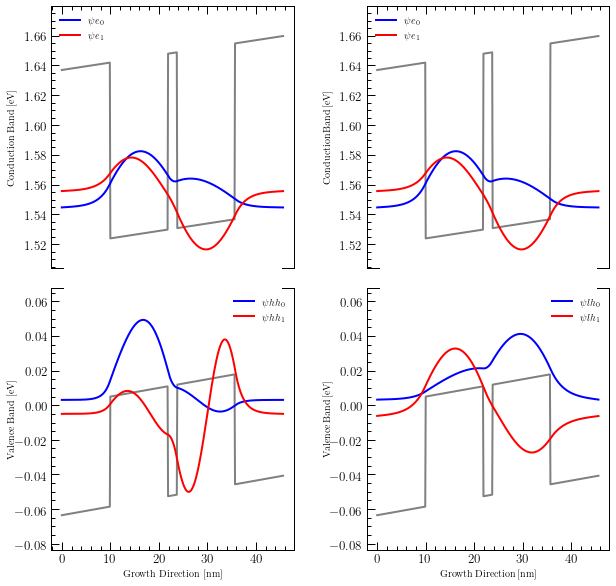

CPU times: user 3.91 s, sys: 234 ms, total: 4.14 s
Wall time: 2.03 s


In [87]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastructure

# TEMPERATURE
s4.T = 4 #Kelvin
# Binding Energy
# Binding Energy
s4.HHBinding = fhh(11.87)*mev #meV
s4.LHBinding = flh(11.87)*mev #meV
# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 2
# APPLIED ELECTRIC FIELD
s4.Fapp = 5e6 # (V/m)

# For 1D, z-axis is choosen
s4.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.92, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(structure4) #

#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = False,Print=True)
TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')
solver.Solver(model4).plotting(sol4,amp=0.4,axmin=25,axmax=25,eymin =-0.02,eymax=0.02,hymin=-0.02,hymax=0.05)
#solver.Solver(model4).print_result("M4_",sol4)

In [55]:
from IPython.display import Image,display
from IPython.core.display import HTML
display(Image(url= "https://journals.aps.org/prb/article/10.1103/PhysRevB.85.045207/figures/2/medium",width=500, unconfined=True))
